In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(os.path.join('data','input_bcell.csv'))
df

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.220,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.860,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.280,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.320,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.640,6.867493,0.103846,-0.578846,21.684615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14382,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,177,191,QVHAEQGLIQYPTAW,0.910,0.175,1.054,0.820,4.894836,0.071719,-0.701083,46.875237,0
14383,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,285,299,SSLAKHGEYAPFARL,0.966,0.216,1.044,1.160,4.894836,0.071719,-0.701083,46.875237,0
14384,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,189,203,TAWQSVGHMMVIFRL,0.821,0.023,1.044,-1.360,4.894836,0.071719,-0.701083,46.875237,0
14385,Q9QZS0,MHSKTAPRFLVFLLLTLLLLLAASPVASKGCVCKGKGQCLCAGTKG...,1479,1493,KRAHGQDLGTLGSCL,1.069,0.239,1.037,2.180,9.553040,0.044338,-0.671001,29.494308,0


In [3]:
unique_protiens_sequences = [i for i in df.protein_seq.unique()]

In [4]:
len(unique_protiens_sequences)

757

In [5]:
unique_peptide_sequences = [i for i in df.peptide_seq.unique()]

In [7]:
len(unique_peptide_sequences)

14362

In [9]:
df.dtypes

parent_protein_id       object
protein_seq             object
start_position           int64
end_position             int64
peptide_seq             object
chou_fasman            float64
emini                  float64
kolaskar_tongaonkar    float64
parker                 float64
isoelectric_point      float64
aromaticity            float64
hydrophobicity         float64
stability              float64
target                   int64
dtype: object

In [10]:
numerical_columns = df.select_dtypes(exclude=['object'])
numerical_columns

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,161,165,1.016,0.703,1.018,2.220,5.810364,0.103275,-0.143829,40.273300,1
1,251,255,0.770,0.179,1.199,-3.860,6.210876,0.065476,-0.036905,24.998512,1
2,145,149,0.852,3.427,0.960,4.280,8.223938,0.091787,0.879227,27.863333,1
3,152,156,1.410,2.548,0.936,6.320,4.237976,0.044776,-0.521393,30.765373,1
4,85,89,1.214,1.908,0.937,4.640,6.867493,0.103846,-0.578846,21.684615,1
...,...,...,...,...,...,...,...,...,...,...,...
14382,177,191,0.910,0.175,1.054,0.820,4.894836,0.071719,-0.701083,46.875237,0
14383,285,299,0.966,0.216,1.044,1.160,4.894836,0.071719,-0.701083,46.875237,0
14384,189,203,0.821,0.023,1.044,-1.360,4.894836,0.071719,-0.701083,46.875237,0
14385,1479,1493,1.069,0.239,1.037,2.180,9.553040,0.044338,-0.671001,29.494308,0


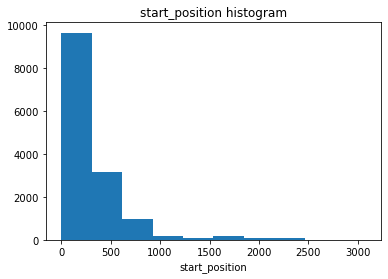

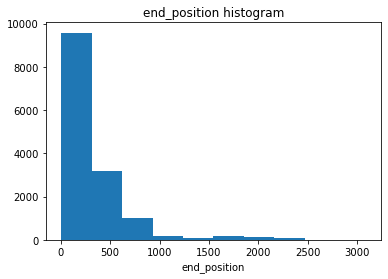

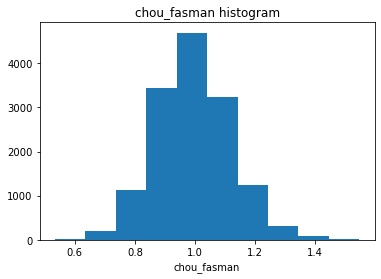

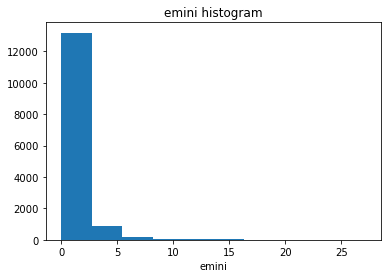

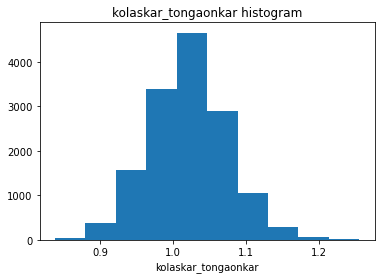

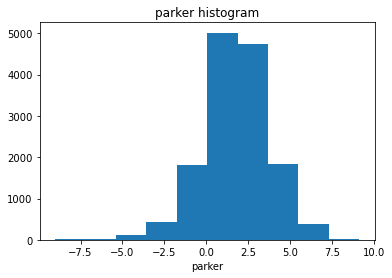

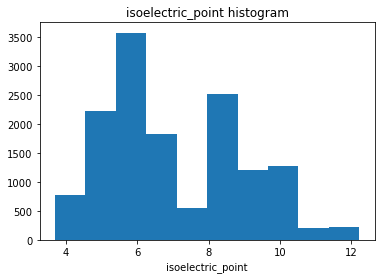

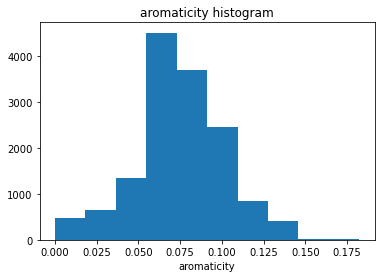

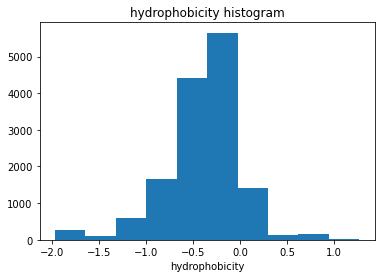

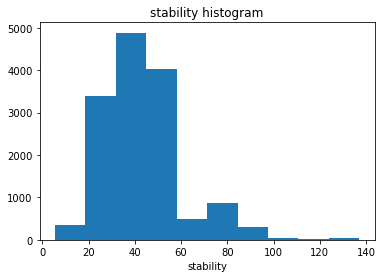

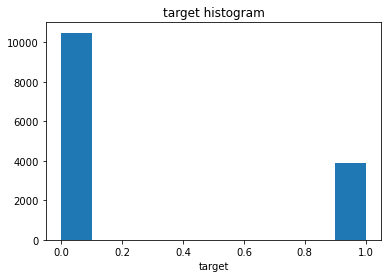

In [13]:
for i in numerical_columns:
    plt.hist(df[f"{i}"])
    plt.title(f"{i} histogram")
    plt.xlabel(f"{i}")
    plt.show()

In [15]:
features = numerical_columns.drop(['target'],axis=1)
target = numerical_columns.target.values.reshape(-1,1)

In [16]:
features

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,161,165,1.016,0.703,1.018,2.220,5.810364,0.103275,-0.143829,40.273300
1,251,255,0.770,0.179,1.199,-3.860,6.210876,0.065476,-0.036905,24.998512
2,145,149,0.852,3.427,0.960,4.280,8.223938,0.091787,0.879227,27.863333
3,152,156,1.410,2.548,0.936,6.320,4.237976,0.044776,-0.521393,30.765373
4,85,89,1.214,1.908,0.937,4.640,6.867493,0.103846,-0.578846,21.684615
...,...,...,...,...,...,...,...,...,...,...
14382,177,191,0.910,0.175,1.054,0.820,4.894836,0.071719,-0.701083,46.875237
14383,285,299,0.966,0.216,1.044,1.160,4.894836,0.071719,-0.701083,46.875237
14384,189,203,0.821,0.023,1.044,-1.360,4.894836,0.071719,-0.701083,46.875237
14385,1479,1493,1.069,0.239,1.037,2.180,9.553040,0.044338,-0.671001,29.494308


In [17]:
target

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

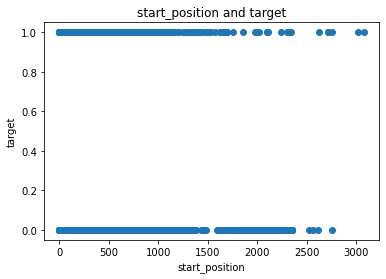

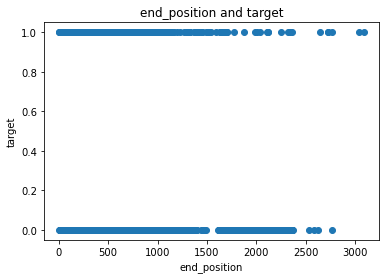

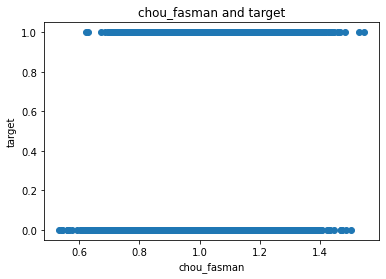

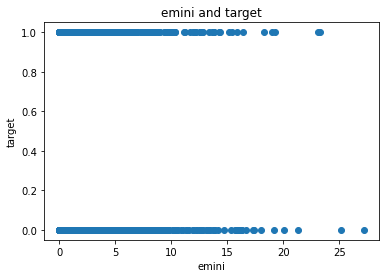

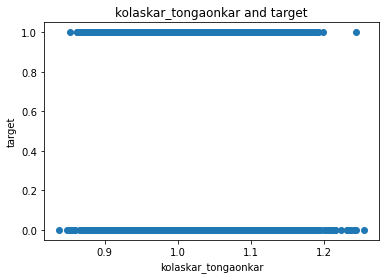

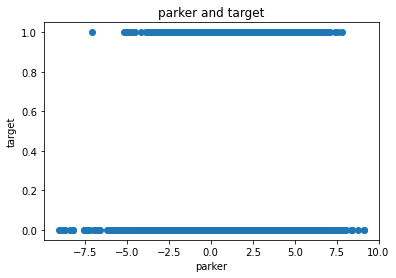

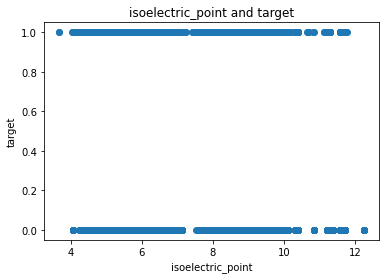

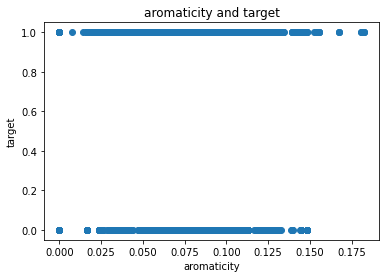

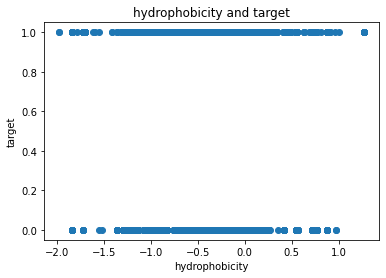

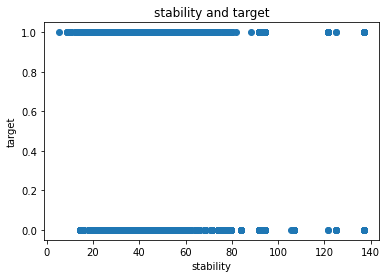

In [20]:
for i in features.columns:
    plt.scatter(df[f"{i}"],target)
    plt.title(f"{i} and target")
    plt.xlabel(f"{i}")
    plt.ylabel("target")
    plt.show()

In [21]:
df

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.220,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.860,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.280,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.320,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.640,6.867493,0.103846,-0.578846,21.684615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14382,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,177,191,QVHAEQGLIQYPTAW,0.910,0.175,1.054,0.820,4.894836,0.071719,-0.701083,46.875237,0
14383,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,285,299,SSLAKHGEYAPFARL,0.966,0.216,1.044,1.160,4.894836,0.071719,-0.701083,46.875237,0
14384,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,189,203,TAWQSVGHMMVIFRL,0.821,0.023,1.044,-1.360,4.894836,0.071719,-0.701083,46.875237,0
14385,Q9QZS0,MHSKTAPRFLVFLLLTLLLLLAASPVASKGCVCKGKGQCLCAGTKG...,1479,1493,KRAHGQDLGTLGSCL,1.069,0.239,1.037,2.180,9.553040,0.044338,-0.671001,29.494308,0
